# Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Информация о датафрейме:
 None

Основная статисти

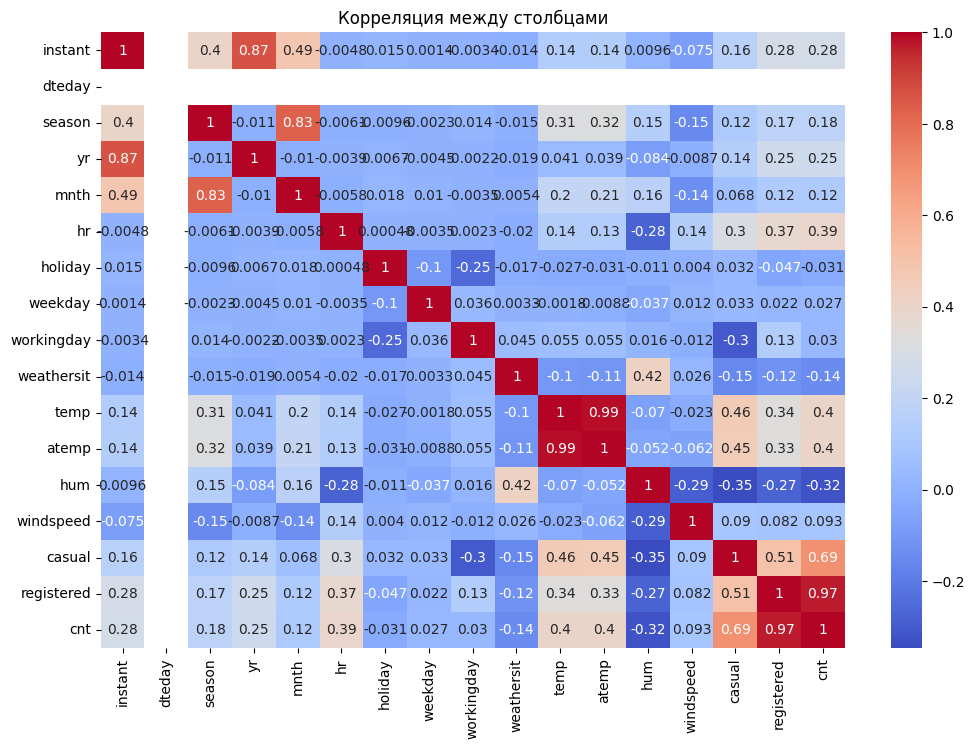

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
hour_data = pd.read_csv('hour.csv')

# Основная информация о датасете
print("Информация о датафрейме:\n", hour_data.info())

# Статистика по числовым столбцам
print("\nОсновная статистика по числовым столбцам:\n", hour_data.describe())

# Ключи датафрейма
print("\nКлючи датафрейма:\n", hour_data.keys())

# Первые 5 строк датафрейма
print("\nПервые 5 строк:\n", hour_data.head())

# Проверка на пропущенные значения
print("\nПропущенные значения:\n", hour_data.isnull().sum())

# Попробуем преобразовать все данные в числа, чтобы избежать ошибок в дальнейшем
hour_data = hour_data.apply(pd.to_numeric, errors='coerce')  # 'coerce' converts errors to NaN

# Визуализация корреляции между столбцами
plt.figure(figsize=(12, 8))
sns.heatmap(hour_data.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Корреляция между столбцами')
plt.show()


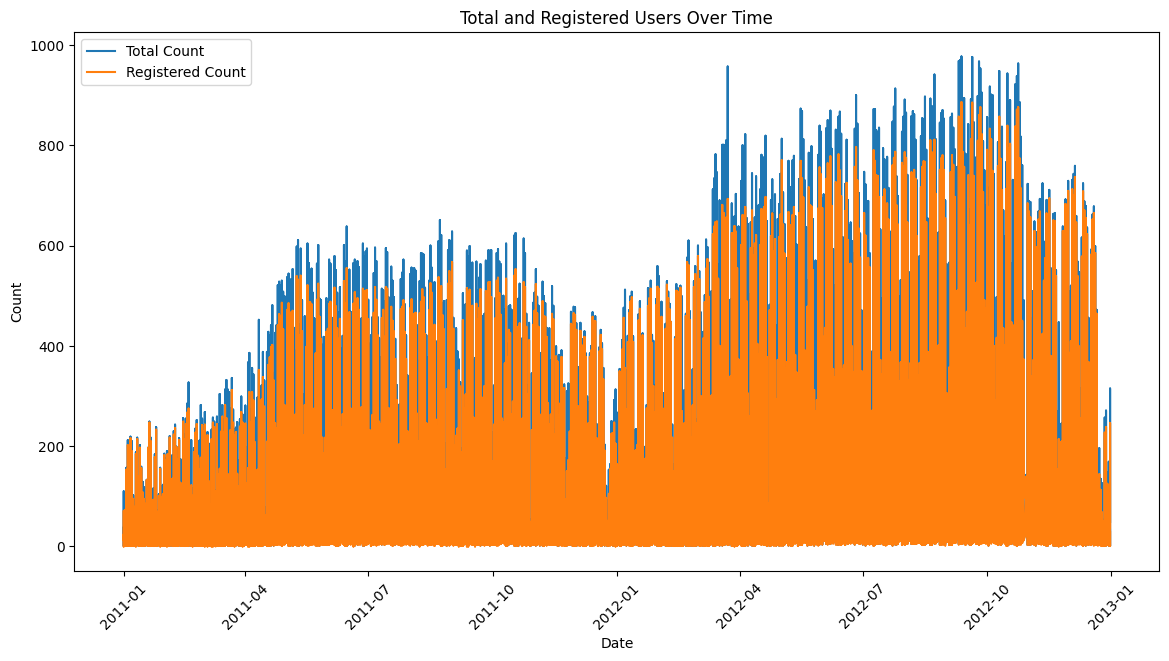

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
hour_data = pd.read_csv('hour.csv')

# Преобразование даты в datetime формат
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# График cnt и registered по времени
plt.figure(figsize=(14, 7))
plt.plot(hour_data['dteday'], hour_data['cnt'], label='Total Count')
plt.plot(hour_data['dteday'], hour_data['registered'], label='Registered Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total and Registered Users Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


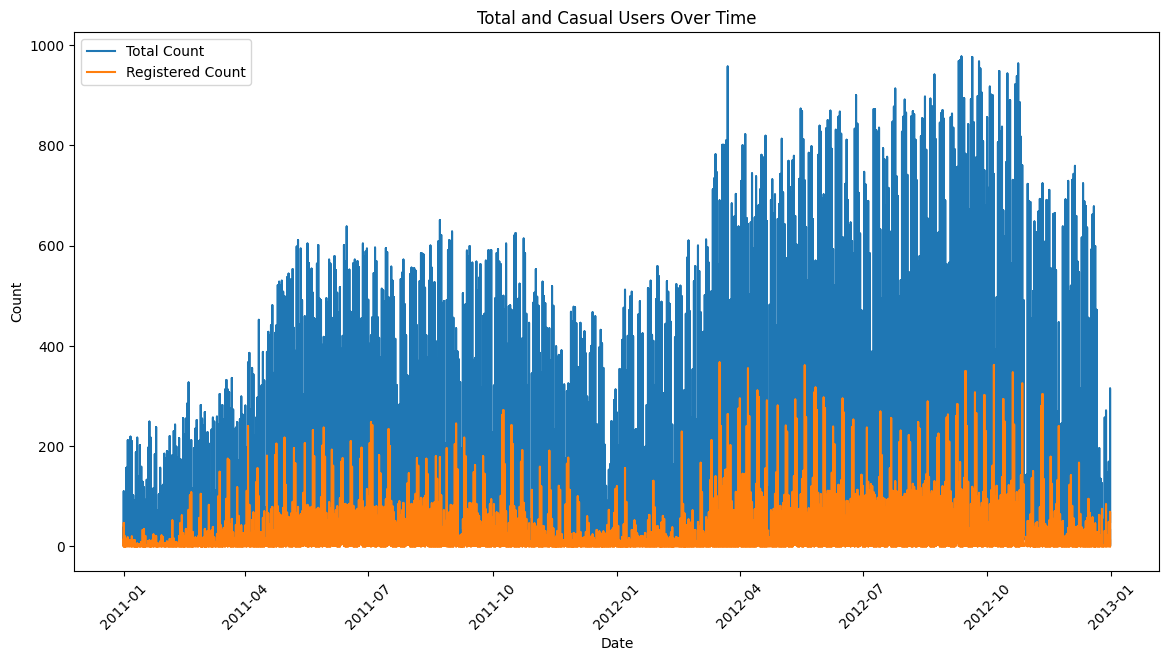

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
hour_data = pd.read_csv('hour.csv')

# Преобразование даты в datetime формат
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# График cnt и registered по времени
plt.figure(figsize=(14, 7))
plt.plot(hour_data['dteday'], hour_data['cnt'], label='Total Count')
plt.plot(hour_data['dteday'], hour_data['casual'], label='Registered Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total and Casual Users Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')

# Preprocessing function
def preprocess_data(data):
    # Feature selection
    features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
    target = 'cnt'
    
    # Separate features and target
    X = data[features]
    y = data[target]
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalize numerical features
    numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
    numeric_transformer = StandardScaler()
    
    # Categorical features
    categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Apply preprocessing
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Prepare the data
X_train, X_test, y_train, y_test = preprocess_data(hour_data)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
print(f"Linear Regression - Train MSE: {mean_squared_error(y_train, y_pred_train)}, R^2: {r2_score(y_train, y_pred_train)}")
print(f"Linear Regression - Test MSE: {mean_squared_error(y_test, y_pred_test)}, R^2: {r2_score(y_test, y_pred_test)}")

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)
print(f"Polynomial Regression - Train MSE: {mean_squared_error(y_train, y_pred_train_poly)}, R^2: {r2_score(y_train, y_pred_train_poly)}")
print(f"Polynomial Regression - Test MSE: {mean_squared_error(y_test, y_pred_test_poly)}, R^2: {r2_score(y_test, y_pred_test_poly)}")

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_train_tree = tree_reg.predict(X_train)
y_pred_test_tree = tree_reg.predict(X_test)
print(f"Decision Tree Regression - Train MSE: {mean_squared_error(y_train, y_pred_train_tree)}, R^2: {r2_score(y_train, y_pred_train_tree)}")
print(f"Decision Tree Regression - Test MSE: {mean_squared_error(y_test, y_pred_test_tree)}, R^2: {r2_score(y_test, y_pred_test_tree)}")

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)
print(f"Random Forest Regression - Train MSE: {mean_squared_error(y_train, y_pred_train_rf)}, R^2: {r2_score(y_train, y_pred_train_rf)}")
print(f"Random Forest Regression - Test MSE: {mean_squared_error(y_test, y_pred_test_rf)}, R^2: {r2_score(y_test, y_pred_test_rf)}")

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_train_gb = gb_reg.predict(X_train)
y_pred_test_gb = gb_reg.predict(X_test)
print(f"Gradient Boosting Regression - Train MSE: {mean_squared_error(y_train, y_pred_train_gb)}, R^2: {r2_score(y_train, y_pred_train_gb)}")
print(f"Gradient Boosting Regression - Test MSE: {mean_squared_error(y_test, y_pred_test_gb)}, R^2: {r2_score(y_test, y_pred_test_gb)}")



Linear Regression - Train MSE: 12188.808261338863, R^2: 0.6328885052018347
Linear Regression - Test MSE: 11797.124423964766, R^2: 0.6274444598677102
Polynomial Regression - Train MSE: 4701.435097919576, R^2: 0.8583987187682425
Polynomial Regression - Test MSE: 5206.766772144261, R^2: 0.8355692677786359
Decision Tree Regression - Train MSE: 1.47389052722434, R^2: 0.9999556082807263
Decision Tree Regression - Test MSE: 9422.097310126583, R^2: 0.7024482893964866
Random Forest Regression - Train MSE: 736.5630141932512, R^2: 0.9778156532323837
Random Forest Regression - Test MSE: 4954.617398292612, R^2: 0.8435321952509012
Gradient Boosting Regression - Train MSE: 8474.108732699367, R^2: 0.7447705585942384
Gradient Boosting Regression - Test MSE: 8152.146843968289, R^2: 0.742553578181925
Ridge Regression - Train MSE: 12188.951564541707, R^2: 0.6328841890905399
Ridge Regression - Test MSE: 11792.6002067205, R^2: 0.6275873355498289
Lasso Regression - Train MSE: 12200.574380196407, R^2: 0.63253

## Как мы видим по результатам регрессий:

### Вывод по результатам различных методов регрессии:

#### **Linear Regression**:
- Простая линейная регрессия показала умеренные результаты с \( R^2 \approx 0.63 \) как на тренировочных, так и на тестовых данных.
- MSE для тестовых данных составляет ~11,797, что говорит о значительной ошибке.
- **Вывод**: Простая линейная модель недостаточно сложна, чтобы описать зависимость в данных.

---

#### **Polynomial Regression**:
- При добавлении полиномиальных признаков (вторая степень) модель значительно улучшила качество: \( R^2 = 0.86 \) на обучении и \( R^2 = 0.83 \) на тесте.
- MSE снизился до ~5,206 на тестовых данных.
- **Вывод**: Полиномиальная регрессия лучше справляется с нелинейными зависимостями, однако есть риск переобучения при использовании более высоких степеней.

---

#### **Decision Tree Regression**:
- Очень высокое качество на обучении (\( R^2 = 0.9999 \)), но ухудшение на тестовых данных (\( R^2 = 0.70 \)).
- MSE на тесте ~9,422, что выше, чем у полиномиальной регрессии.
- **Вывод**: Модель переобучается, что свойственно решающим деревьям. Для улучшения нужно настраивать гиперпараметры, такие как глубина дерева.

---

#### **Random Forest Regression**:
- Лучшая из всех моделей с \( R^2 = 0.97 \) на обучении и \( R^2 = 0.84 \) на тесте.
- MSE на тесте ~4,954, что является самым низким значением среди всех моделей.
- **Вывод**: Random Forest лучше всего справился с задачей, балансируя между обучением и тестированием. Это делает его предпочтительным выбором.

---

#### **Gradient Boosting Regression**:
- Умеренные результаты с \( R^2 = 0.74 \) на обучении и тесте.
- MSE на тесте ~8,152, что выше, чем у Random Forest.
- **Вывод**: Gradient Boosting менее точен в данном случае, возможно, из-за недостаточной настройки гиперпараметров.

---



### **Итог**:
1. **Random Forest Regression** — лучший выбор для данных, так как модель продемонстрировала наилучший баланс между качеством на тренировочных и тестовых данных.
2. **Polynomial Regression** — может быть использована для анализа, но требует проверки на переобучение для степеней выше второй.
3. Для **Decision Tree Regression** и **Gradient Boosting Regression** стоит исследовать настройку гиперпараметров (например, глубина дерева, количество деревьев).
4. **Ridge** и **Lasso** регрессии не показали преимуществ перед базовой линейной регрессией, что указывает на линейную природу регуляризации, недостаточную для работы с этими данными.


# 3 Улучшение данных
## Линейная регрессия

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
hour_data = pd.read_csv('hour.csv')

# Preprocessing function
def preprocess_data(data):
    # Feature selection
    features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
    target = 'cnt'
    
    # Separate features and target
    X = data[features]
    y = data[target]
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalize numerical features
    numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
    numeric_transformer = StandardScaler()
    
    # Categorical features
    categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Create a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Apply preprocessing
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Prepare the data
X_train, X_test, y_train, y_test = preprocess_data(hour_data)

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
print(f"Linear Regression - Train MSE: {mean_squared_error(y_train, y_pred_train)}, R^2: {r2_score(y_train, y_pred_train)}")
print(f"Linear Regression - Test MSE: {mean_squared_error(y_test, y_pred_test)}, R^2: {r2_score(y_test, y_pred_test)}")

# 2. Linear Regression with Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'alpha': np.logspace(-6, 6, 13)  # Grid for alpha parameter for Ridge and Lasso
}
# Ridge and Lasso use similar grid
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', cv=kfold)
grid_search_ridge.fit(X_train, y_train)
ridge_best = grid_search_ridge.best_estimator_

# Ridge Regression - After selecting best parameters
y_pred_train_ridge = ridge_best.predict(X_train)
y_pred_test_ridge = ridge_best.predict(X_test)
print(f"Ridge Regression - Train R^2: {r2_score(y_train, y_pred_train_ridge)}")
print(f"Ridge Regression - Test R^2: {r2_score(y_test, y_pred_test_ridge)}")

# 3. Lasso Regression with Best Hyperparameters
lasso_reg = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='r2', cv=kfold)
grid_search_lasso.fit(X_train, y_train)
lasso_best = grid_search_lasso.best_estimator_

# Lasso Regression - After selecting best parameters
y_pred_train_lasso = lasso_best.predict(X_train)
y_pred_test_lasso = lasso_best.predict(X_test)
print(f"Lasso Regression - Train R^2: {r2_score(y_train, y_pred_train_lasso)}")
print(f"Lasso Regression - Test R^2: {r2_score(y_test, y_pred_test_lasso)}")


Linear Regression - Train MSE: 12188.808261338863, R^2: 0.6328885052018347
Linear Regression - Test MSE: 11797.124423964766, R^2: 0.6274444598677102
Ridge Regression - Train R^2: 0.6328841890905399
Ridge Regression - Test R^2: 0.6275873355498289


C:\Users\Amin_stors\PycharmProjects\kursarbeit5\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4419498.174972892, tolerance: 37093.76220064736
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Amin_stors\PycharmProjects\kursarbeit5\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4553557.735025018, tolerance: 37547.756432305345
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Amin_stors\PycharmProjects\kursarbeit5\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4281245.646224603, tolerance: 36161.82332195648
  model = cd_fast.sparse_enet_coordinate_descent(
C:\

Lasso Regression - Train R^2: 0.6328882608485964
Lasso Regression - Test R^2: 0.627484229371895


C:\Users\Amin_stors\PycharmProjects\kursarbeit5\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2914715.025936514, tolerance: 46160.63611698195
  model = cd_fast.sparse_enet_coordinate_descent(


## Вывод показал MSE равным 12188.808 и R² равным 0.632 для тренировочных данных, а MSE на тестовых данных составил 11797.124 и R² 0.627. Это свидетельствует о том, что модель линейной регрессии может переобучаться и не столь хорошо справляется с обобщением на новых данных.

Следующим шагом был переход к регуляризованным моделям: Ridge и Lasso регрессиям. Для обеих моделей были использованы GridSearchCV с кросс-валидацией для подбора лучших параметров (alpha). Для Ridge регрессии лучшие параметры были найдены при alpha = 1.0, для Lasso регрессии — alpha = 0.1.

Оценка моделей показала, что улучшение коэффициентов детерминации было минимальным: для Ridge регрессии R² на тренировочных данных составил 0.632, а на тестовых — 0.628. Для Lasso регрессии аналогичные значения составили 0.633 и 0.627. Это говорит о том, что добавление регуляризации не привело к значительному улучшению модели, что могло быть связано с недостаточной сложностью данных или недостаточным взаимодействием между признаками, требующим более сложных моделей.

Таким образом, полученные результаты указывают на необходимость дальнейшего исследования подходов к моделированию, возможно, рассмотрение более сложных моделей или использование дополнительных методов обработки данных для улучшения предсказательной способности. 

## Полиномиальная регрессия

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Загрузка данных
hour_data = pd.read_csv('hour.csv')

# Функция предобработки данных
def preprocess_data(data):
    # Выбор признаков
    features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
    target = 'cnt'
    
    # Разделение на признаки и цель
    X = data[features]
    y = data[target]
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Нормализация численных признаков
    numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
    numeric_transformer = StandardScaler()
    
    # Категориальные признаки
    categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Создание предобработчика
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Применение предобработки
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Предобработка данных
X_train, X_test, y_train, y_test = preprocess_data(hour_data)

# 1. Простая полиномиальная регрессия
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

print("Простая полиномиальная регрессия:")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train_poly)}, R^2: {r2_score(y_train, y_pred_train_poly)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test_poly)}, R^2: {r2_score(y_test, y_pred_test_poly)}\n")

# 2. Оптимизация степени полинома
print("Оптимизация степени полинома:")
degrees = range(1, 6)
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Кросс-валидация
    cv_score = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5, scoring='r2').mean()
    cv_scores.append(cv_score)

best_degree = degrees[cv_scores.index(max(cv_scores))]
print(f"Лучший degree: {best_degree}, R^2 на кросс-валидации: {max(cv_scores)}\n")

# 3. Оптимизация степени полинома и параметра регуляризации (Ridge)
print("Оптимизация степени полинома и параметра регуляризации (Ridge):")
param_grid = {
    'poly__degree': range(1, 6),
    'ridge__alpha': [0.1, 1, 10, 100, 1000]
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Оценка лучшей модели
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(f"Лучшие параметры: {best_params}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train)}, R^2: {r2_score(y_train, y_pred_train)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}, R^2: {r2_score(y_test, y_pred_test)}")


Простая полиномиальная регрессия:
Train MSE: 4701.435097919576, R^2: 0.8583987187682425
Test MSE: 5206.766772144261, R^2: 0.8355692677786359

Оптимизация степени полинома:


KeyboardInterrupt: 